In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
loan_wc= pd.read_csv(r"C:\Users\User\Desktop\Study Guide\ML Projects\Supervised Learning\Classification and Regression\Decision Tree\Loan-Repayment---Decision-Tree\Decision_Tree_ Dataset.csv")

In [3]:
loan_wc.head()

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [14]:
loan=loan_wc.rename(columns={ "1" : "Initial Payment", "2":"Last Payment", "3":"Credit Score", "4" :"House Number", 'sum': "Sum", "Unnamed: 5" : "Result"})

In [15]:
loan.head()

,Initial Payment,Last Payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [17]:
loan=loan.drop(columns=["Sum"])

In [19]:
loan.head()

,Initial Payment,Last Payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [20]:
X=loan.iloc[:,:-1]
y=loan.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtc_entropy = DecisionTreeClassifier( criterion = "entropy", max_depth= 3, min_samples_leaf=5, random_state=0)

In [23]:
dtc_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=0)

In [24]:
y_pred=dtc_entropy.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
print(accuracy_score(y_pred,y_test))

0.92


In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       0.88      0.97      0.92       101
         yes       0.97      0.87      0.91        99

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [30]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[98,  3],
       [13, 86]])

Text(8.222222222222223, 0.5, 'Predicted')

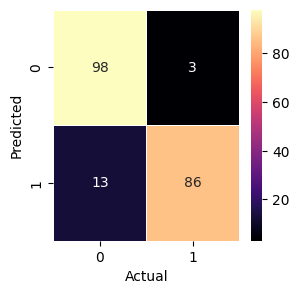

In [32]:
plt.figure(figsize=(3,3))

sns.heatmap(cm, annot=True, fmt='d', cmap='magma' , xticklabels=True, yticklabels=True, linewidth=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")